In [ ]:
# 1

import random
import math

# Define the function to be maximized
def f(x, y, z):
    return math.exp(math.sin(40*z)) + math.sin(60*math.cos(z)) + math.exp(math.sin(50*x)) + math.sin(60*math.exp(y)) + math.sin(70*math.sin(x)) + math.sin(math.sin(80*y)) - math.sin(10*(x+y)) + (x**2 + y**2 + z**2) / 100

# Random search algorithm
def random_search(num_samples):
    best_point = None
    best_value = float('-inf')
    for _ in range(num_samples):
        x = random.uniform(0, 5)
        y = random.uniform(0, 5)
        z = random.uniform(0, 5)
        value = f(x, y, z)
        if value > best_value:
            best_value = value
            best_point = (x, y, z)
    return best_point, best_value

# Hill climbing algorithm
def hill_climbing(start_point, num_iterations):
    x, y, z = start_point
    best_point = start_point
    best_value = f(x, y, z)

    for _ in range(num_iterations):
        neighbors = [(nx, ny, nz) for nx in [x - 0.001, x, x + 0.001] for ny in [y - 0.001, y, y + 0.001] for nz in [z - 0.001, z, z + 0.001]]
        neighbors.remove(start_point)  # Remove current point from neighbors

        for neighbor in neighbors:
            nx, ny, nz = neighbor
            if 0 <= nx <= 5 and 0 <= ny <= 5 and 0 <= nz <= 5:
                neighbor_value = f(nx, ny, nz)
                if neighbor_value > best_value:
                    best_value = neighbor_value
                    best_point = (nx, ny, nz)

    return best_point, best_value

# Simulated annealing algorithm
def simulated_annealing(start_point, steps):
    xbest, ybest, zbest = start_point
    fbest = f(xbest, ybest, zbest)

    for i in range(1, steps):
        # Temperature function
        T = 2 * (1 - i / steps)

        # Generate a new solution by adding random noise
        xnew = random.uniform(0, 5)
        ynew = random.uniform(0, 5)
        znew = random.uniform(0, 5)

        fnew = f(xnew, ynew, znew)

        # Accept better solutions
        if fnew > fbest:
            xbest, ybest, zbest = xnew, ynew, znew
            fbest = fnew
        # Accept worse solutions with a certain probability
        elif random.random() < math.exp((fnew - fbest) / T):
            xbest, ybest, zbest = xnew, ynew, znew
            fbest = fnew

    return (xbest, ybest, zbest), fbest

# Iterated local search algorithm
def iterated_local_search(start_point, small_steps, big_steps):
    xopt, yopt, zopt = start_point
    fopt = f(xopt, yopt, zopt)

    best_point = (xopt, yopt, zopt)
    best_value = fopt

    for _ in range(big_steps):
        # Perform hill climbing (small steps)
        new_point, new_value = hill_climbing(best_point, small_steps)

        # Update the overall optimal solution
        if new_value > best_value:
            best_point = new_point
            best_value = new_value

        # Perform a big step (perturbation)
        best_point = (random.uniform(0, 5), random.uniform(0, 5), random.uniform(0, 5))

    return best_point, best_value

# Brute force search algorithm
def brute_force(start_point, grid_size):
    best_point = None
    best_value = float('-inf')
    step = 0.1  # Smaller search space around the starting point
    for x in range(int(start_point[0] * 10 - grid_size), int(start_point[0] * 10 + grid_size + 1)):
        for y in range(int(start_point[1] * 10 - grid_size), int(start_point[1] * 10 + grid_size + 1)):
            for z in range(int(start_point[2] * 10 - grid_size), int(start_point[2] * 10 + grid_size + 1)):
                px, py, pz = x * step, y * step, z * step
                value = f(px, py, pz)
                if value > best_value:
                    best_value = value
                    best_point = (px, py, pz)
    return best_point, best_value

# Parameters
num_random_samples = 100000 #  Increase this value to generate more random samples
hill_climbing_iterations = 100000 #  Increase this value to allow the simulated annealing algorithm to explore more steps during the optimization process
simulated_annealing_steps = 1000 # Increase this value to allow the simulated annealing algorithm to explore more steps during the optimization process
iterated_local_search_small_steps = 1000 # Increase this value to allow the hill climbing phase (small steps) within the iterated local search to explore more iterations
iterated_local_search_big_steps = 1000 # Increase this value to perform more perturbations (big steps) during the iterated local search process
brute_force_grid_size = 100 # Increase this value to expand the search space around the starting point for the brute force search.

# Integrate the algorithms
random_best_point, random_best_value = random_search(num_random_samples)
hill_climbing_best_point, hill_climbing_best_value = hill_climbing(random_best_point, hill_climbing_iterations)
simulated_annealing_best_point, simulated_annealing_best_value = simulated_annealing(hill_climbing_best_point, simulated_annealing_steps)
iterated_local_search_best_point, iterated_local_search_best_value = iterated_local_search(simulated_annealing_best_point, iterated_local_search_small_steps, iterated_local_search_big_steps)
brute_force_best_point, brute_force_best_value = brute_force(iterated_local_search_best_point, brute_force_grid_size)

# Find the overall best solution
overall_best_value = max(random_best_value, hill_climbing_best_value, simulated_annealing_best_value, iterated_local_search_best_value, brute_force_best_value)
overall_best_point = None
if overall_best_value == random_best_value:
    overall_best_point = random_best_point
elif overall_best_value == hill_climbing_best_value:
    overall_best_point = hill_climbing_best_point
elif overall_best_value == simulated_annealing_best_value:
    overall_best_point = simulated_annealing_best_point
elif overall_best_value == iterated_local_search_best_value:
    overall_best_point = iterated_local_search_best_point
else:
    overall_best_point = brute_force_best_point

# Output results
print("Random Search:")
print("Best Point:", random_best_point)
print("Best Value:", random_best_value)
print("\nHill Climbing from Random Search:")
print("Best Point:", hill_climbing_best_point)
print("Best Value:", hill_climbing_best_value)
print("\nSimulated Annealing from Hill Climbing:")
print("Best Point:", simulated_annealing_best_point)
print("Best Value:", simulated_annealing_best_value)
print("\nIterated Local Search from Simulated Annealing:")
print("Best Point:", iterated_local_search_best_point)
print("Best Value:", iterated_local_search_best_value)
print("\nBrute Force Search around Iterated Local Search:")
print("Best Point:", brute_force_best_point)
print("Best Value:", brute_force_best_value)

Random Search:
Best Point: (4.424891003419107, 4.266052627862451, 1.7603785705030068)
Best Value: 10.167453409236346

Hill Climbing from Random Search:
Best Point: (4.425891003419108, 4.266052627862451, 1.7613785705030067)
Best Value: 10.20494444931401

Simulated Annealing from Hill Climbing:
Best Point: (3.9179008189209856, 3.480970835699493, 2.399148803706076)
Best Value: 8.955989998907189

Iterated Local Search from Simulated Annealing:
Best Point: (1.1894280638343102, 3.9649231854115543, 3.173896277979355)
Best Value: 9.538333604557376

Brute Force Search around Iterated Local Search:
Best Point: (10.700000000000001, 13.600000000000001, 12.3)
Best Value: 13.58133102769356


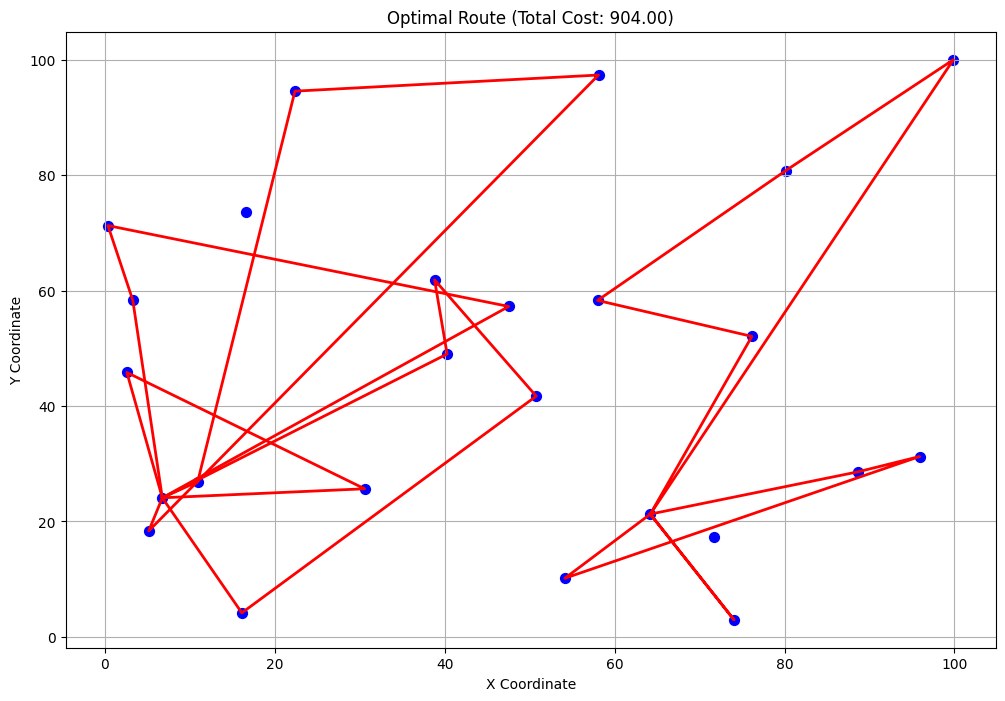

Warehouse assignments:
Warehouse 1: [1, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 22]
Warehouse 2: [2, 6, 12, 17, 18, 19, 20, 21, 23]

Number of vans for each warehouse:
Warehouse 1: 1
Warehouse 2: 1

Number of lorries for each warehouse:
Warehouse 1: 0
Warehouse 2: 0

Total cost: 904.00
Routes for each vehicle:
Vehicle 1: [0, 0, 2, 3, 4, 0]
Vehicle 2: [0, 6, 7, 8, 9, 0]
Vehicle 3: [0, 10, 12, 13, 14, 0]
Vehicle 4: [0, 15, 21, 0]
Vehicle 5: [1, 1, 5, 11, 16, 1]
Vehicle 6: [1, 17, 18, 19, 20, 1]
Vehicle 7: [1, 22, 1]


In [ ]:
#2


# Hybrid Genetic Algorithm with Local Search

import numpy as np
import sys
import math
import random
import heapq
import matplotlib.pyplot as plt
from itertools import chain

if sys.version_info < (3, 0):
    sys.exit("""Sorry, requires Python 3.x, not Python 2.x.""")


###########################################################################
##### PART 1: Creates the Distance Matrix
class Graph:
    def __init__(self, coordinates, distance_matrix):
        self.coordinates = coordinates
        self.n_warehouses = 2
        self.n_stores = len(coordinates) - self.n_warehouses
        self.distance_matrix = distance_matrix


###########################################################################
##### PART 2: Plots the optimial route on a map.
def plot_route(graph, best_solution):
    """Plots the optimal route on a map"""
    # Extract the vertices (coordinates) from the best solution
    vertices = [graph.coordinates[i] for i in range(len(graph.coordinates))]

    # Get the warehouse assignments and vehicle assignments from the best solution
    warehouse_assignments = best_solution.warehouse_assignments
    vehicle_assignments = best_solution.vehicle_assignments

    # Create a list of routes for each warehouse and vehicle
    routes = []
    for warehouse in range(graph.n_warehouses):
        assigned_stores = [i for i, w in enumerate(warehouse_assignments) if w == warehouse]
        if vehicle_assignments[warehouse] == 'van':
            for i in range(0, len(assigned_stores), 4):
                route = [warehouse] + assigned_stores[i:i + 4] + [warehouse]
                routes.append(route)
        else:
            route = [warehouse] + assigned_stores + [warehouse]
            routes.append(route)

    # Plot the routes
    plt.figure(figsize=(12, 8))
    plt.title(f"Optimal Route (Total Cost: {best_solution.cost:.2f})")
    plt.scatter(*zip(*vertices), c='b', s=50, marker='o')

    for route in routes:
        route_vertices = [vertices[i] for i in route]
        plt.plot(*zip(*route_vertices), '-r', linewidth=2)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()


###########################################################################
##### PART 3: Calculates the distance of a given path
class Tour:
    def __init__(self, graph, warehouse_assignments, vehicle_assignments, routes=None):
        self.graph = graph
        self.warehouse_assignments = warehouse_assignments
        self.vehicle_assignments = vehicle_assignments
        self.routes = routes if routes else []
        self.cost = self.calculate_cost()

    def calculate_cost(self):
        total_cost = 0
        for warehouse in range(self.graph.n_warehouses):
            assigned_stores = [i for i, w in enumerate(self.warehouse_assignments) if w == warehouse]
            if self.vehicle_assignments[warehouse] == 'van':
                for i in range(0, len(assigned_stores), 4):
                    route = [warehouse] + assigned_stores[i:i+4] + [warehouse]
                    total_cost += sum([self.graph.distance_matrix[route[j]][route[j+1]] for j in range(len(route)-1)]) * 1
                    self.routes.append(route)  # Store the route for vans
            else:
                route = [warehouse] + assigned_stores + [warehouse]
                total_cost += sum([self.graph.distance_matrix[route[j]][route[j+1]] for j in range(len(route)-1)]) * 2
                self.routes.append(route)  # Store the route for lorries
        return total_cost


###########################################################################
##### PART 4:  Hybrid Genetic Algorithm parameters with Local Search (Probability of creating each type of child)
class GeneticAlgorithm:
    def __init__(self, graph, vans_per_warehouse, lorries_per_warehouse, population_size, elite_mating_rate=0.5, mutation_rate=0.2, mutation_swap_rate=0.5, local_search_rate=0.5):
        self.graph = graph
        self.vans_per_warehouse = vans_per_warehouse
        self.lorries_per_warehouse = lorries_per_warehouse
        self.population_size = population_size
        self.elite_mating_rate = elite_mating_rate
        self.mutation_rate = mutation_rate
        self.mutation_swap_rate = mutation_swap_rate
        self.local_search_rate = local_search_rate
        self.population = self.initialize_population()

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            warehouse_assignments = [random.randint(0, 1) for _ in range(self.graph.n_stores)]
            vehicle_assignments = ['van' if random.random() < 0.6 else 'lorry' for _ in range(self.graph.n_warehouses)]
            population.append(Tour(self.graph, warehouse_assignments, vehicle_assignments))
        return population

    def run(self, iterations=100):
        for _ in range(iterations):
            self.evolve()

        self.population = sorted(self.population, key=lambda x: x.cost)
        best_solution = self.population[0]
        plot_route(self.graph, best_solution)
        self.print_solution(best_solution)

    def best(self):
        return self.population[0]

    def print_solution(self, best_solution):
        warehouse_1 = [i + 1 for i, w in enumerate(best_solution.warehouse_assignments) if w == 0]
        warehouse_2 = [i + 1 for i, w in enumerate(best_solution.warehouse_assignments) if w == 1]

        vans_warehouse_1 = min(len(warehouse_1) // 4, self.vans_per_warehouse)
        lorries_warehouse_1 = min((len(warehouse_1) - vans_warehouse_1 * 4) // 16, self.lorries_per_warehouse)
        vans_warehouse_2 = min(len(warehouse_2) // 4, self.vans_per_warehouse)
        lorries_warehouse_2 = min((len(warehouse_2) - vans_warehouse_2 * 4) // 16, self.lorries_per_warehouse)

#The following is to print my outputs
        print("Warehouse assignments:")
        print(f"Warehouse 1: {warehouse_1}")
        print(f"Warehouse 2: {warehouse_2}")

        print("\nNumber of vans for each warehouse:")
        print(f"Warehouse 1: {vans_warehouse_1}")
        print(f"Warehouse 2: {vans_warehouse_2}")

        print("\nNumber of lorries for each warehouse:")
        print(f"Warehouse 1: {lorries_warehouse_1}")
        print(f"Warehouse 2: {lorries_warehouse_2}")

        print(f"\nTotal cost: {best_solution.cost:.2f}")

        print("Routes for each vehicle:")
        for i, route in enumerate(best_solution.routes):
            print(f"Vehicle {i+1}: {route}")

    def crossover(self, parent1, parent2):
        child_warehouse_assignments = parent1.warehouse_assignments.copy()
        child_vehicle_assignments = parent1.vehicle_assignments.copy()

        # Crossover warehouse assignments
        crossover_point = random.randint(0, self.graph.n_stores - 1)
        child_warehouse_assignments[crossover_point:] = parent2.warehouse_assignments[crossover_point:]

        # Crossover vehicle assignments
        if random.random() < 0.5:
            child_vehicle_assignments[0] = parent2.vehicle_assignments[0]
        if random.random() < 0.5:
            child_vehicle_assignments[1] = parent2.vehicle_assignments[1]

        child = Tour(self.graph, child_warehouse_assignments, child_vehicle_assignments)
        return child

    def mutate(self, tour):
        if random.random() < self.mutation_rate:
            # Mutate warehouse assignments
            for i in range(self.graph.n_stores):
                if random.random() < self.mutation_swap_rate:
                    tour.warehouse_assignments[i] = 1 - tour.warehouse_assignments[i]

            # Mutate vehicle assignments
            if random.random() < self.mutation_swap_rate:
                tour.vehicle_assignments[0] = 'van' if tour.vehicle_assignments[0] == 'lorry' else 'lorry'
            if random.random() < self.mutation_swap_rate:
                tour.vehicle_assignments[1] = 'van' if tour.vehicle_assignments[1] == 'lorry' else 'lorry'

        return tour

    def local_search(self, tour):
        """Simple hill climbing in my own case here"""
        initial_cost = tour.cost
        for i in range(self.graph.n_stores):
            for j in range(i + 1, self.graph.n_stores):
                tour.warehouse_assignments[i], tour.warehouse_assignments[j] = tour.warehouse_assignments[j], tour.warehouse_assignments[i]
                new_tour = Tour(self.graph, tour.warehouse_assignments, tour.vehicle_assignments)
                if new_tour.cost < tour.cost:
                    tour = new_tour
                else:
                    tour.warehouse_assignments[i], tour.warehouse_assignments[j] = tour.warehouse_assignments[j], tour.warehouse_assignments[i]

        return tour

    def evolve(self):
        new_population = []
        for _ in range(self.population_size):
            parent1 = self.select_parent()
            parent2 = self.select_parent()
            child = self.crossover(parent1, parent2)
            self.mutate(child)

            # Apply local search with a given probability
            if random.random() < self.local_search_rate:
                child = self.local_search(child)

            new_population.append(child)

        self.population = sorted(self.population + new_population, key=lambda t: t.cost)[:self.population_size]

    def select_parent(self):
        tournament = random.sample(self.population, 5)
        return max(tournament, key=lambda t: t.cost)


###########################################################################
##### PART 10: Input the data for the problem
def run_genetic_algorithm():
    distance_matrix = np.array([
        [0, 58, 34, 48, 53, 49, 6, 89, 72, 5, 42, 89, 50, 47, 22, 24, 82, 75, 62, 93, 120, 22, 71],
        [65, 0, 80, 89, 47, 19, 67, 81, 92, 62, 45, 28, 55, 32, 57, 42, 20, 35, 43, 64, 87, 75, 14],
        [58, 65, 0, 13, 44, 70, 40, 67, 41, 32, 38, 97, 36, 50, 56, 69, 90, 73, 55, 80, 105, 13, 90],
        [71, 81, 13, 0, 49, 81, 53, 63, 32, 46, 46, 104, 40, 58, 69, 62, 98, 78, 59, 80, 104, 26, 100],
        [40, 48, 44, 49, 0, 48, 58, 41, 45, 48, 11, 55, 10, 16, 62, 36, 50, 29, 11, 40, 68, 46, 60],
        [79, 65, 44, 60, 49, 0, 40, 85, 90, 46, 41, 47, 54, 32, 38, 28, 39, 47, 48, 75, 101, 63, 21],
        [6, 67, 40, 53, 58, 50, 0, 95, 78, 10, 47, 92, 55, 51, 18, 26, 84, 79, 66, 98, 125, 28, 71],
        [81, 81, 67, 63, 41, 87, 95, 0, 36, 85, 52, 76, 40, 56, 102, 77, 75, 49, 39, 28, 42, 76, 96],
        [92, 92, 41, 32, 45, 90, 78, 36, 0, 69, 49, 97, 37, 60, 91, 69, 93, 69, 51, 59, 78, 53, 105],
        [10, 62, 32, 46, 48, 46, 10, 85, 69, 0, 37, 37, 45, 43, 23, 20, 78, 70, 57, 88, 115, 21, 68],
        [37, 45, 38, 46, 11, 41, 47, 52, 49, 37, 0, 85, 13, 46, 51, 25, 52, 36, 20, 51, 78, 38, 57],
        [78, 28, 97, 104, 55, 47, 92, 76, 97, 37, 85, 0, 65, 13, 84, 66, 8, 29, 47, 52, 69, 94, 36],
        [39, 55, 36, 40, 10, 54, 55, 40, 37, 45, 13, 65, 0, 23, 62, 37, 60, 39, 20, 45, 72, 40, 69],
        [50, 32, 50, 58, 16, 32, 51, 56, 60, 43, 46, 13, 23, 0, 51, 26, 40, 27, 18, 49, 76, 48, 45],
        [22, 57, 56, 69, 62, 38, 18, 102, 91, 23, 51, 84, 62, 51, 0, 26, 77, 39, 68, 100, 127, 44, 58],
        [24, 42, 69, 62, 36, 28, 26, 77, 69, 20, 25, 66, 37, 26, 26, 0, 58, 27, 43, 74, 102, 34, 49],
        [82, 20, 90, 98, 50, 39, 84, 75, 93, 52, 52, 8, 60, 40, 77, 58, 0, 27, 43, 53, 72, 88, 29],
        [75, 35, 73, 78, 29, 47, 79, 49, 69, 36, 36, 29, 39, 27, 39, 27, 27, 0, 19, 37, 56, 59, 55],
        [62, 43, 55, 59, 11, 48, 66, 39, 51, 57, 20, 47, 20, 18, 68, 43, 43, 19, 0, 31, 58, 53, 56],
        [93, 64, 80, 80, 40, 75, 98, 28, 59, 88, 51, 52, 45, 49, 100, 74, 53, 37, 31, 0, 27, 82, 75],
        [120, 87, 105, 104, 68, 101, 125, 42, 78, 115, 78, 69, 72, 76, 127, 102, 72, 56, 58, 27, 0, 107, 92],
        [22, 75, 13, 26, 46, 63, 28, 76, 53, 21, 38, 94, 40, 48, 44, 34, 88, 59, 53, 82, 107, 0, 81],
        [71, 14, 90, 100, 60, 21, 71, 96, 105, 68, 57, 36, 69, 45, 58, 49, 29, 55, 56, 75, 92, 81, 0]
    ])

    coordinates = [
        (6.75859879717907, 24.10112205956711), (64.2020211216308, 21.27800052239122),
        (3.28223545665507, 58.32805859952553), (0.356408133450226, 71.25359844419144),
        (47.5416279589111, 57.24219473219685), (54.1391723668124, 10.16301447085656),
        (5.16311785475916, 18.37136898886647), (58.1077341232713, 97.3258720034798),
        (22.3719171429327, 94.53074723315319), (10.9215147296463, 26.90262604314181),
        (40.2830425950062, 49.00596111851571), (95.9067950103118, 31.25379213905931),
        (38.8068853736467, 61.84963411870661), (50.7736281603872, 41.712298841316614),
        (16.1210451723109, 4.174152111856982), (30.5725260368337, 25.664161394440316),
        (88.6541848293903, 28.603405845026217), (76.1583329812348, 52.06010200815772),
        (57.9907902884404, 58.29016932248472), (80.1180100459334, 80.74242100600462),
        (99.879027610417, 99.97690565317312), (2.58720752188314, 45.80849396842282),
        (74.0498005304951, 2.9861311577228923), (71.7091166549543, 17.2581705831028),
        (16.6066387616466, 73.6752906752222)
    ]

    graph = Graph(coordinates, distance_matrix)

    vans_per_warehouse = 1
    lorries_per_warehouse = 1
    population_size = 100 #Increasing the population size can lead to a more diverse set of solutions
    elite_mating_rate = 0.8 #Increasing the elite mating rate can help preserve the best solutions in the population, but it may also lead to premature convergence.
    mutation_rate = 0.5  #Increasing the mutation rate can introduce more diversity into the population
    mutation_swap_rate = 0.9 #This parameter controls the probability of swapping the warehouse assignment or vehicle assignment during the mutation process.
    local_search_rate = 0.9  # Increasing the local search rate can help the algorithm find better solutions by exploiting the local neighborhood of the current solutions

    ga = GeneticAlgorithm(graph, vans_per_warehouse, lorries_per_warehouse, population_size,
                          elite_mating_rate, mutation_rate, mutation_swap_rate, local_search_rate)

    ga.run(iterations=500)


if __name__ == "__main__":
    run_genetic_algorithm()

Optimal Routes:
UK to USA - 200 seats
USA to UK - 200 seats
UK to Australia - 150 seats
UK to Canada - 150 seats
Canada to UK - 150 seats
UK to France - 42 seats
UK to Germany - 42 seats
UK to Spain - 50 seats
UK to Italy - 42 seats
UK to Egypt - 100 seats
UK to Greece - 100 seats
UK to Turkey - 150 seats
UK to Kenya - 80 seats
UK to Malaysia - 100 seats
UK to Netherlands - 42 seats
UK to Belgium - 50 seats
UK to Portugal - 50 seats
UK to Switzerland - 80 seats
UK to Austria - 50 seats
UK to Poland - 50 seats
UK to Hungary - 42 seats
UK to Ireland - 150 seats
UK to Ukraine - 50 seats
UK to Jamaica - 80 seats
UK to Cyprus - 50 seats

Number of Aircraft:
UK to USA - 200 seats: 2 aircraft
USA to UK - 200 seats: 2 aircraft
UK to Australia - 150 seats: 1 aircraft
UK to Canada - 150 seats: 1 aircraft
Canada to UK - 150 seats: 1 aircraft
UK to France - 42 seats: 1 aircraft
UK to Germany - 42 seats: 1 aircraft
UK to Spain - 50 seats: 1 aircraft
UK to Italy - 42 seats: 1 aircraft
UK to Egypt - 

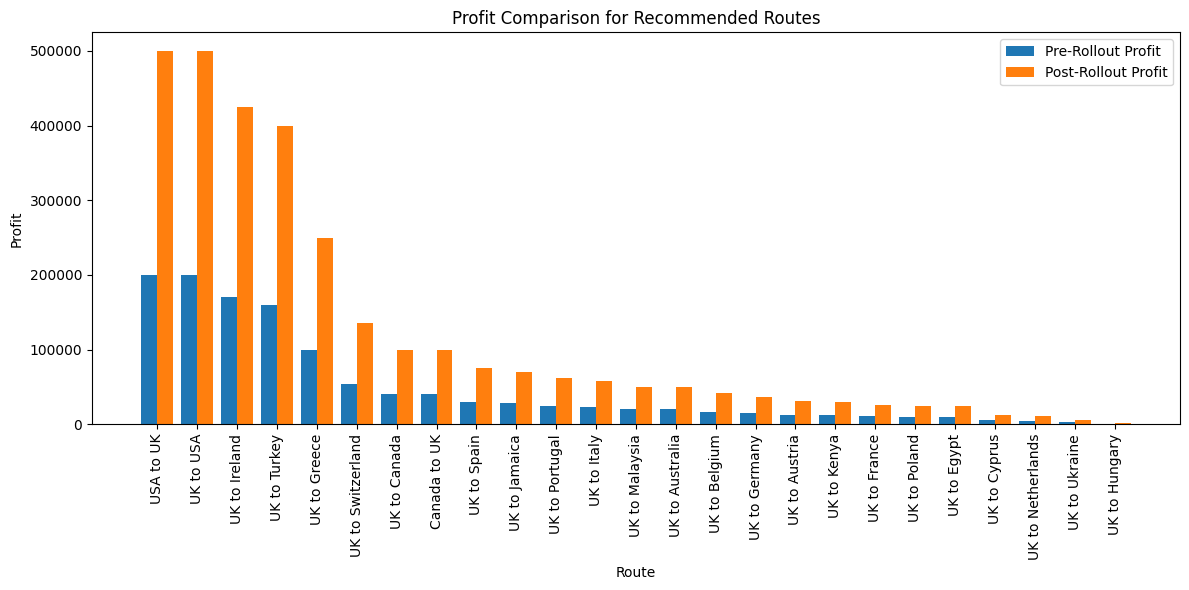

In [ ]:
#3
import numpy as np
import random
from itertools import chain
import matplotlib.pyplot as plt

class AirlineOptimization:
    def __init__(self, route_data):
        self.route_data = route_data
        self.num_routes = len(route_data)
        self.num_aircraft_models = len(set(chain(*[route[1:3] for route in route_data])))
        self.population_size = 1000  # Size of the population
        self.elite_mating_rate = 0.5  # Rate of elite mating (not used in this implementation)
        self.mutation_rate = 0.2  # Probability of mutation
        self.mutation_swap_rate = 0.5  # Probability of swapping during mutation
        self.population = self.initialize_population()

    def initialize_population(self):
        """
        Initialize the population with random route and aircraft decisions.
        """
        population = []
        for _ in range(self.population_size):
            route_decisions = [random.randint(0, 1) for _ in range(self.num_routes)]  # 0 or 1 for each route
            aircraft_decisions = [random.randint(0, self.num_aircraft_models - 1) for _ in range(self.num_routes)]  # Aircraft model for each route
            population.append((route_decisions, aircraft_decisions))
        return population

    def calculate_fitness(self, individual):
        """
        Calculate the fitness (total profit) of an individual solution.
        """
        route_decisions, aircraft_decisions = individual
        total_profit = 0
        for i, (route, model, num_aircraft, ticket_price, op_cost, profit) in enumerate(self.route_data):
            if route_decisions[i]:
                if profit * 2.5 > 0:  # Only consider routes with positive post-rollout profit
                    total_profit += profit * 2.5
                else:
                    total_profit -= 1000000  # Heavily penalize routes with negative post-rollout profit
            else:
                total_profit += profit
        return total_profit

    def select_parent(self):
        """
        Select a parent individual using tournament selection.
        """
        tournament = random.sample(self.population, 5)
        return max(tournament, key=self.calculate_fitness)

    def crossover(self, parent1, parent2):
        """
        Perform crossover between two parent individuals to create a child.
        """
        child_route_decisions = parent1[0].copy()
        child_aircraft_decisions = parent1[1].copy()

        crossover_point = random.randint(0, self.num_routes - 1)
        child_route_decisions[crossover_point:] = parent2[0][crossover_point:]
        child_aircraft_decisions[crossover_point:] = parent2[1][crossover_point:]

        return (child_route_decisions, child_aircraft_decisions)

    def mutate(self, individual):
        """
        Mutate an individual by swapping route or aircraft decisions.
        """
        route_decisions, aircraft_decisions = individual
        if random.random() < self.mutation_rate:
            for i in range(self.num_routes):
                if random.random() < self.mutation_swap_rate:
                    route_decisions[i] = 1 - route_decisions[i]
                if random.random() < self.mutation_swap_rate:
                    aircraft_decisions[i] = random.randint(0, self.num_aircraft_models - 1)
        return (route_decisions, aircraft_decisions)

    def evolve(self):
        """
        Evolve the population by performing selection, crossover, and mutation.
        """
        new_population = []
        for _ in range(self.population_size):
            parent1 = self.select_parent()
            parent2 = self.select_parent()
            child = self.crossover(parent1, parent2)
            self.mutate(child)
            new_population.append(child)

        self.population = sorted(self.population + new_population, key=self.calculate_fitness, reverse=True)[:self.population_size]

    def run(self, iterations=100):
        """
        Run the genetic algorithm for a specified number of iterations.
        """
        self.best_profit_history = []
        for _ in range(iterations):
            self.evolve()
            best_profit = self.calculate_fitness(self.population[0])
            self.best_profit_history.append(best_profit)

        best_individual = self.population[0]
        self.print_results(best_individual)
        self.plot_profit_comparison(best_individual)

    def print_results(self, best_individual):
        """
        Print the optimal routes, number of aircraft, and aircraft models.
        """
        route_decisions, aircraft_decisions = best_individual

        print("Optimal Routes:")
        for i, (route, model, num_aircraft, ticket_price, op_cost, profit) in enumerate(self.route_data):
            if route_decisions[i]:
                print(f"{route} - {model} seats")

        print("\nNumber of Aircraft:")
        for i, (route, model, num_aircraft, ticket_price, op_cost, profit) in enumerate(self.route_data):
            if route_decisions[i]:
                print(f"{route} - {model} seats: {num_aircraft} aircraft")

        print("\nOptimal Aircraft Models:")
        for i, (route, model, num_aircraft, ticket_price, op_cost, profit) in enumerate(self.route_data):
            if route_decisions[i]:
                print(f"{route} - {model} seats: {num_aircraft} aircraft")

    def plot_profit_comparison(self, best_individual):
        """
        Plot a comparison of pre-rollout and post-rollout profits for recommended routes.
        """
        route_decisions, aircraft_decisions = best_individual
        recommended_routes = []
        pre_rollout_profits = []
        post_rollout_profits = []

        for i, (route, model, num_aircraft, ticket_price, op_cost, profit) in enumerate(self.route_data):
            if route_decisions[i] and profit > 0:  # Only include routes with positive pre-rollout profit
                recommended_routes.append(route)
                pre_rollout_profits.append(profit)
                post_rollout_profits.append(profit * 2.5)

        # Sort the data in descending order of post-rollout profits
        post_rollout_profits, pre_rollout_profits, recommended_routes = zip(*sorted(zip(post_rollout_profits, pre_rollout_profits, recommended_routes), reverse=True))

        plt.figure(figsize=(12, 6))
        x = np.arange(len(recommended_routes))
        width = 0.4
        plt.bar(x - width/2, pre_rollout_profits, width, label='Pre-Rollout Profit')
        plt.bar(x + width/2, post_rollout_profits, width, label='Post-Rollout Profit')
        plt.title("Profit Comparison for Recommended Routes")
        plt.xlabel("Route")
        plt.ylabel("Profit")
        plt.xticks(x, recommended_routes, rotation=90)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Data collected from various sources
route_data = [
    ("UK to USA", 200, 2, 2000, 300000, 200000),
    ("USA to UK", 200, 2, 2000, 300000, 200000),
    ("UK to Saudi", 80, 1, 1800, 250000, -106000),
    ("UK to UAE", 80, 1, 1500, 250000, -130000),
    ("Saudi to UK", 80, 1, 1700, 250000, -114000),
    ("UK to Australia", 150, 1, 1800, 250000, 20000),
    ("Australia to UK", 150, 1, 1800, 250000, 20000),
    ("UK to Canada", 150, 1, 1600, 200000, 40000),
    ("Canada to UK", 150, 1, 1600, 200000, 40000),
    ("UK to South Africa", 100, 1, 1500, 150000, 0),
    ("UK to Nigeria", 100, 1, 1400, 150000, -10000),
    ("UK to France", 42, 1, 1200, 40000, 10400),
    ("UK to Germany", 42, 1, 1300, 40000, 14600),
    ("UK to Spain", 50, 1, 1400, 40000, 30000),
    ("UK to Italy", 42, 1, 1500, 40000, 23000),
    ("UK to Japan", 50, 1, 1600, 200000, -120000),
    ("UK to China", 80, 1, 1700, 200000, -64000),
    ("UK to Brazil", 42, 1, 1800, 200000, -124400),
    ("UK to Mexico", 80, 1, 1900, 200000, -48000),
    ("UK to India", 100, 1, 1900, 200000, -10000),
    ("UK to South Korea", 100, 1, 1750, 200000, -25000),
    ("UK to Thailand", 80, 1, 1700, 200000, -64000),
    ("UK to Egypt", 100, 1, 1600, 150000, 10000),
    ("UK to Greece", 100, 1, 1500, 50000, 100000),
    ("UK to Turkey", 150, 1, 1400, 50000, 160000),
    ("UK to Russia", 30, 1, 1350, 50000, -9500),
    ("UK to Argentia", 50, 1, 1550, 100000, -22500),
    ("UK to Kenya", 80, 1, 1400, 100000, 12000),
    ("UK to Singapore", 80, 1, 1600, 150000, -22000),
    ("UK to Malaysia", 100, 1, 1700, 150000, 20000),
    ("UK to Indonesia", 80, 1, 1600, 150000, -22000),
    ("UK to Vietinam", 50, 1, 1650, 150000, -67500),
    ("UK to Philippines", 80, 1, 1550, 150000, -26000),
    ("UK to Sweden", 42, 1, 1400, 75000, -16200),
    ("UK to Norway", 50, 1, 1400, 75000, -5000),
    ("UK to Denmark", 50, 1, 1400, 75000, -5000),
    ("UK to Finland", 50, 1, 1400, 75000, -5000),
    ("UK to Netherlands", 42, 1, 1300, 50000, 4600),
    ("UK to Belgium", 50, 1, 1330, 50000, 16500),
    ("UK to Portugal", 50, 1, 1500, 50000, 25000),
    ("UK to Switzerland", 80, 1, 1300, 50000, 54000),
    ("UK to Austria", 50, 1, 1250, 50000, 12500),
    ("UK to Poland", 50, 1, 1200, 50000, 10000),
    ("UK to Czech Republic", 42, 1, 1200, 50000, 400),
    ("UK to Hungary", 42, 1, 1200, 50000, 400),
    ("UK to Ireland", 150, 1, 1400, 40000, 170000),
    ("UK to Ukraine", 50, 1, 1450, 70000, 2500),
    ("UK to Jamaica", 80, 1, 1600, 100000, 28000),
    ("UK to Cyprus", 50, 1, 1500, 70000, 5000),
    ("UK to Seychelles", 50, 1, 1600, 150000, -70000)
]

optimizer = AirlineOptimization(route_data)
optimizer.run()